<a href="https://colab.research.google.com/github/aprajeeta-99/python_projects/blob/main/Python_Calculate_Value_at_Risk_(VaR)_Using_the_Historical_Simulation_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

##Setting Time Range and Ticker List


In this section, we set the time range for our historical data to 15 years and create a list of stock tickers for our portfolio.



In [ ]:
### Set time from to a certain number of years
years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)

### Create a list of tickers
tickers = ['SPY','BND','GLD','QQQ','VTI']

##Downloading Adjusted Close Prices

Next, we download the daily adjusted close prices for each stock ticker using the yfinance library and store the data in a DataFrame.

In [ ]:
### Download the daily adjusted close prices for the tickers
adj_close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start = startDate, end = endDate)
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2009-08-05   75.937782  50.723106   94.779999   34.715935   38.567791
2009-08-06   75.544479  50.755737   94.599998   34.410114   38.301857
2009-08-07   76.535225  50.403145   93.750000   34.847015   38.841324
2009-08-10   76.376396  50.814503   92.930000   34.602329   38.750137
2009-08-11   75.423492  50.912457   92.790001   34.305267   38.248669
...                ...        ...         ...         ...         ...
2024-07-25  538.409973  72.650002  218.330002  458.269989  266.500000
2024-07-26  544.440002  72.940002  220.630005  462.970001  269.690002
2024-07-29  544.760010  73.029999  220.320007  463.899994  269.709991
2024-07-30  542.000000  73.120003  222.520004  457.529999  268.589996
2024-07-31  550.809998  73.519997  226.550003  471.070007  272.570007

[3772 rows x 5 columns]


##Calculating Daily Log Returns


We calculate the daily log returns for each stock in our portfolio and drop any missing values.



In [ ]:
### Calculate the daily log returns and drop any NAs
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns  = log_returns.dropna()

print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2009-08-06 -0.005193  0.000643 -0.001901 -0.008848 -0.006919
2009-08-07  0.013030 -0.006971 -0.009026  0.012616  0.013986
2009-08-10 -0.002077  0.008129 -0.008785 -0.007046 -0.002350
2009-08-11 -0.012555  0.001925 -0.001508 -0.008623 -0.013025
2009-08-12  0.010672 -0.000642  0.001723  0.015418  0.010866
...              ...       ...       ...       ...       ...
2024-07-25 -0.005224  0.002205 -0.015768 -0.011089 -0.003857
2024-07-26  0.011137  0.003984  0.010479  0.010204  0.011899
2024-07-29  0.000588  0.001233 -0.001406  0.002007  0.000074
2024-07-30 -0.005079  0.001232  0.009936 -0.013827 -0.004161
2024-07-31  0.016124  0.005455  0.017949  0.029164  0.014709

[3771 rows x 5 columns]


##Creating an Equally Weighted Portfolio


Now, we’ll create an equally weighted portfolio with a total value of $1,000,000.



In [ ]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


##Calculating Historical Portfolio Returns


With the weights defined, we can now calculate the historical portfolio returns.



 Calculates the historical portfolio returns by multiplying the daily log returns (log_returns) by the corresponding asset weights (weights) and summing the results along each row (axis=1). This effectively computes the weighted average of the daily log returns for the portfolio.

In [ ]:
historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

Date
2009-08-06   -0.004444
2009-08-07    0.004727
2009-08-10   -0.002426
2009-08-11   -0.006757
2009-08-12    0.007607
                ...   
2024-07-25   -0.006747
2024-07-26    0.009541
2024-07-29    0.000499
2024-07-30   -0.002380
2024-07-31    0.016680
Length: 3771, dtype: float64


##Finding X-Day Historical Returns


Next, we’ll find the X-day historical returns. In this example, we’ll use a 50-day window.



In [ ]:
days = 50

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2009-10-15    0.075198
2009-10-16    0.076053
2009-10-19    0.078899
2009-10-20    0.077930
2009-10-21    0.081163
                ...   
2024-07-25    0.027847
2024-07-26    0.031944
2024-07-29    0.020604
2024-07-30    0.020698
2024-07-31    0.034134
Length: 3722, dtype: float64


##Calculating VaR Using the Historical Method


Now, we can specify a confidence interval and calculate the Value at Risk (VaR) using the historical method.



In [ ]:
confidence_interval = 0.99

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

109874.69566751963


##Plotting the Results of the Historical Returns


Finally, let’s plot the results of the historical returns to visualize the distribution of portfolio returns and the VaR at the specified confidence level.



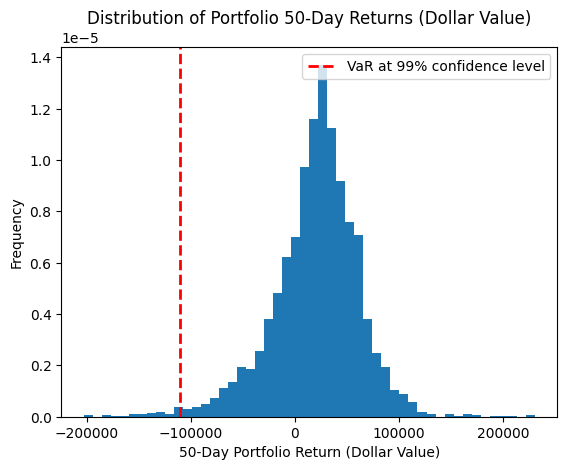

In [ ]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

CONCLUSION:

In conclusion, the historical method for calculating Value at Risk (VaR) provides a simple and intuitive way to estimate the potential losses in your investment portfolio. However, it is essential to remember that historical returns do not guarantee future performance, and relying solely on this method may lead to inaccurate risk assessments.